# Top 50 Spotify Tracks of 2020


### Data
For this analysis been used Top 50 Spotify Tracks of 2020 data: https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020


### Installation
To perform following data wrangling you need to install `requirements.txt` where are all pacages used for this project

```bash
pip install requirements.txt
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('C:\\Users\\pelec\\Desktop\\Turing College\\DS\\1st sprint\\Project Sprint 2\\spotifytoptracks.csv',
                   index_col=0)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


### Performing data cleaning
- Checking for null values
- Droping dublicates
- Checking for any possible outliers by using `describe()`

In [5]:
df.isnull().any()
df = df.drop_duplicates()
df.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


How many observations are there in this dataset?

In [6]:
df.shape[0]

50

How many features this dataset has?

In [7]:
len(df.loc[0])

16

Which of the features are categorical?

In [8]:
col = [0,1,2,15]
df.columns[col]

Index(['artist', 'album', 'track_name', 'genre'], dtype='object')

Which of the features are numeric?

In [9]:
col = [4,5,6,7,8,9,10,11,12,13,14]
df.columns[col]

Index(['energy', 'danceability', 'key', 'loudness', 'acousticness',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

Are there any artists that have more than 1 popular track? If yes, which and how many?

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64


Text(0.5, 1.0, "Artists and how many song they're having in Top 50 of 2020")

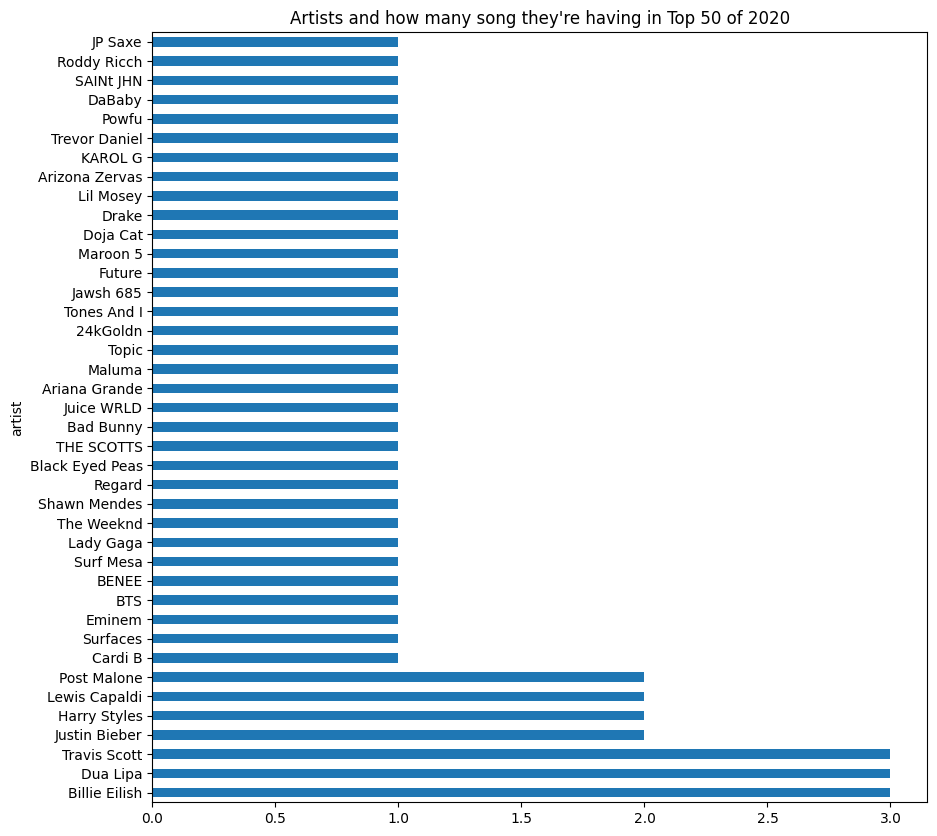

In [10]:
print(df.artist.value_counts()[df.artist.value_counts() > 1])
df.artist.value_counts().plot(kind="barh", figsize=(10, 10))
plt.title("Artists and how many song they're having in Top 50 of 2020")

Who was the most popular artist?

In [11]:
df.artist.value_counts().idxmax()

'Billie Eilish'

How many artists in total have their songs in the top 50?

In [12]:
len(df.artist.unique())

40

Are there any albums that have more than 1 popular track? If yes, which and how many?

album
Changes                 2
Fine Line               2
Future Nostalgia        3
Hollywood's Bleeding    2
dtype: int64


Text(0.5, 1.0, 'Albums and how many songs they have in Top 50 of 2020')

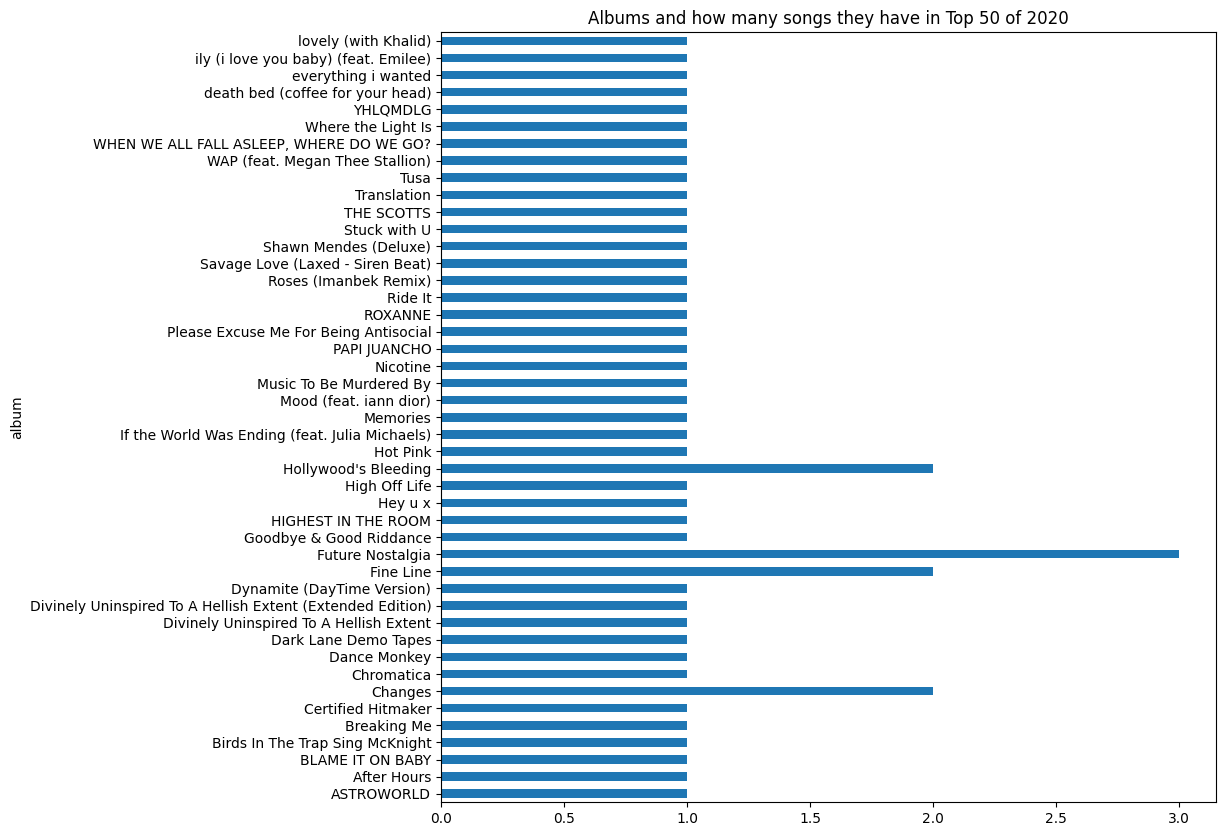

In [13]:
print(df.groupby('album').size()[df.groupby('album').size() > 1])
df.groupby('album').size().plot(kind="barh", figsize=(10, 10))
plt.title("Albums and how many songs they have in Top 50 of 2020")

How many albums in total have their songs in the top 50?

In [14]:
len(df.album.value_counts())

45

Which tracks have a danceability score above 0.7?

In [15]:
list(df.loc[df['danceability'] > 0.7, 'track_name'])

['Dance Monkey',
 'The Box',
 'Roses - Imanbek Remix',
 "Don't Start Now",
 'ROCKSTAR (feat. Roddy Ricch)',
 'death bed (coffee for your head)',
 'Falling',
 'Tusa',
 'Blueberry Faygo',
 'Intentions (feat. Quavo)',
 'Toosie Slide',
 'Say So',
 'Memories',
 'Life Is Good (feat. Drake)',
 'Savage Love (Laxed - Siren Beat)',
 'Breaking Me',
 'everything i wanted',
 'Señorita',
 'bad guy',
 'WAP (feat. Megan Thee Stallion)',
 'Sunday Best',
 'Godzilla (feat. Juice WRLD)',
 'Break My Heart',
 'Dynamite',
 'Supalonely (feat. Gus Dapperton)',
 'Sunflower - Spider-Man: Into the Spider-Verse',
 'Hawái',
 'Ride It',
 'goosebumps',
 'RITMO (Bad Boys For Life)',
 'THE SCOTTS',
 'SICKO MODE']

Which tracks have a danceability score below 0.4?

In [16]:
df[df['danceability'] < 0.4]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
44,Billie Eilish,lovely (with Khalid),lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,0.296,0.351,4,-10.109,0.934,0.0333,0.0,0.095,0.12,115.284,200186,Chamber pop


Which tracks have their loudness above -5

In [17]:
list(df.loc[df['loudness'] > -5, 'track_name'])

["Don't Start Now",
 'Watermelon Sugar',
 'Tusa',
 'Circles',
 'Before You Go',
 'Say So',
 'Adore You',
 'Mood (feat. iann dior)',
 'Break My Heart',
 'Dynamite',
 'Supalonely (feat. Gus Dapperton)',
 'Rain On Me (with Ariana Grande)',
 'Sunflower - Spider-Man: Into the Spider-Verse',
 'Hawái',
 'Ride It',
 'goosebumps',
 'Safaera',
 'Physical',
 'SICKO MODE']

Which tracks have their loudness below -8?

In [18]:
list(df.loc[df['loudness'] < -8, 'track_name'])

['death bed (coffee for your head)',
 'Falling',
 'Toosie Slide',
 'Savage Love (Laxed - Siren Beat)',
 'everything i wanted',
 'bad guy',
 'HIGHEST IN THE ROOM',
 'lovely (with Khalid)',
 'If the World Was Ending - feat. Julia Michaels']

Which track is the longest?

In [19]:
print(df.loc[df['duration_ms'].idxmax(), 'track_name'])

SICKO MODE


Which track is the shortest?

In [20]:
df.loc[df['duration_ms'].idxmin(), 'track_name']

'Mood (feat. iann dior)'

Which genre is the most popular?

The most popular genre Pop


Text(0.5, 1.0, 'Distribution of Genres')

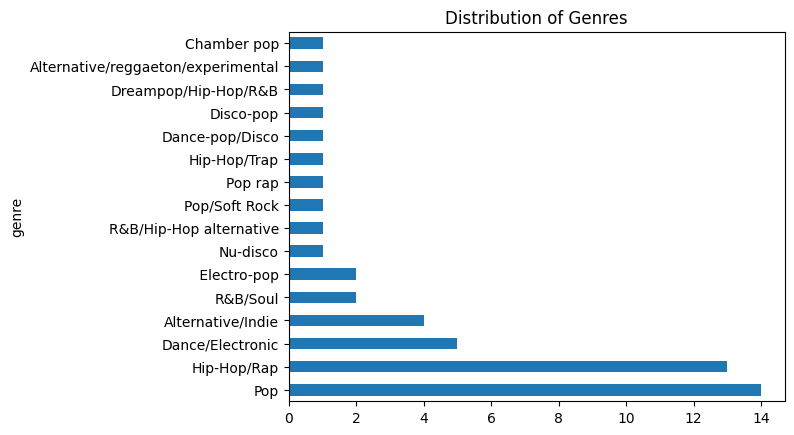

In [21]:
print('The most popular genre', df['genre'].value_counts().idxmax())
ax = df['genre'].value_counts().plot(kind="barh")
ax.set_title('Distribution of Genres')

Which genres have just one song on the top 50?

In [22]:
df['genre'].value_counts()[df['genre'].value_counts() == 1]

genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64

How many genres in total are represented in the top 50?

In [23]:
len(df['genre'].unique())

16

Which features are strongly positively correlated?

To anwser this qestion been used NumPy function `np.triu()`.
This function returns upper triangular.
In this function we're passing correlation matrix of `numeric_features` and setting `k=1`.
Setting `k=1` makes main diagonal elements to zeros.

Max correlation 0.7511538349500361
Min correlation -0.6389922909081498


<Axes: >

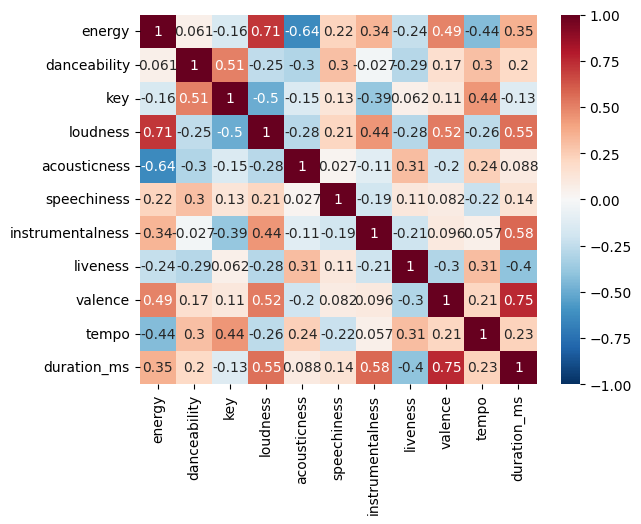

In [28]:
col = [4,5,6,7,8,9,10,11,12,13,14]
numeric_features = df.loc[col]
corr = numeric_features.select_dtypes('number').corr()
max_corr = np.triu(corr, k=1).max()
min_corr = np.triu(corr, k=1).min()
print('Max correlation', max_corr)
print('Min correlation', min_corr)
sns.heatmap(corr, cmap="RdBu_r", annot=True, vmin=-1, vmax=1)

How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
1. Picked genres
2. Maked new DataFrame of picked genres
3. Calculated z-score to see outliers. Z-scores shows standard deviation of a data point from the mean.
4. Keeping only values of the z-score is less than or equal to 1.96. In other words we picked 95% cofident level.
5. Generate boxplot

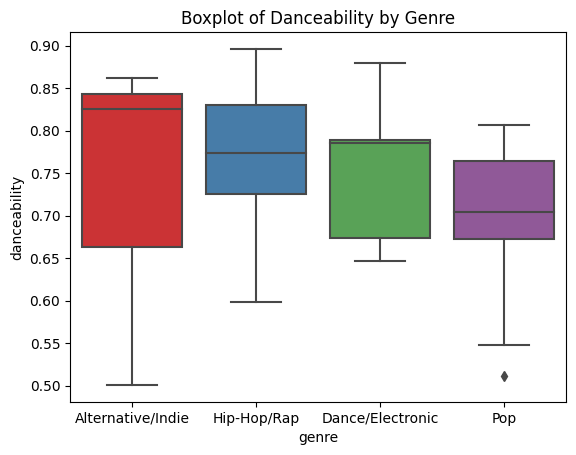

In [38]:
genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

df_genres = df[df['genre'].isin(genres)]
z_scores = stats.zscore(df_genres['danceability'])
df_genres = df_genres[abs(z_scores) <= 1.96]

sns.boxplot(x='genre', y='danceability', data=df_genres, palette='Set1')
plt.title('Boxplot of Danceability by Genre')
plt.show()

How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
1. Picked genres
2. Maked new DataFrame of picked genres
3. Calculated z-score to see outliers. Z-scores shows standard deviation of a data point from the mean.
4. Keeping only values of the z-score is less than or equal to 1.96. In other words we picked 95% cofident level.
5. Generate boxplot

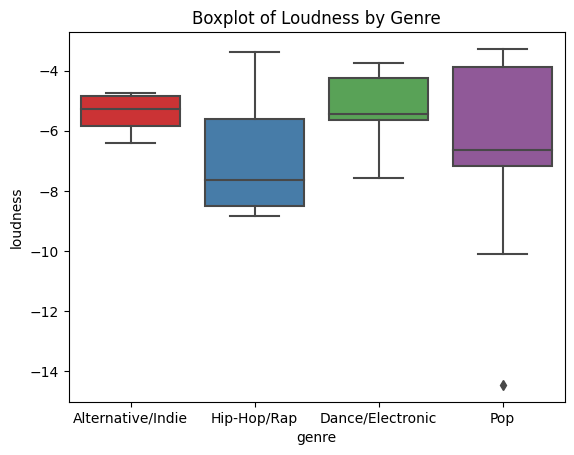

In [35]:
genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

df_genres = df[df['genre'].isin(genres)]
z_scores = stats.zscore(df_genres['loudness'])
df_selected_genres = df_genres[abs(z_scores) <= 1.96]

sns.boxplot(x='genre', y='loudness', data=df_genres, palette='Set1')
plt.title('Boxplot of Loudness by Genre')
plt.show()

How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
1. Picked genres
2. Maked new DataFrame of picked genres
3. Calculated z-score to see outliers. Z-scores shows standard deviation of a data point from the mean.
4. Keeping only values of the z-score is less than or equal to 1.96. In other words we picked 95% cofident level.
5. Generate boxplot

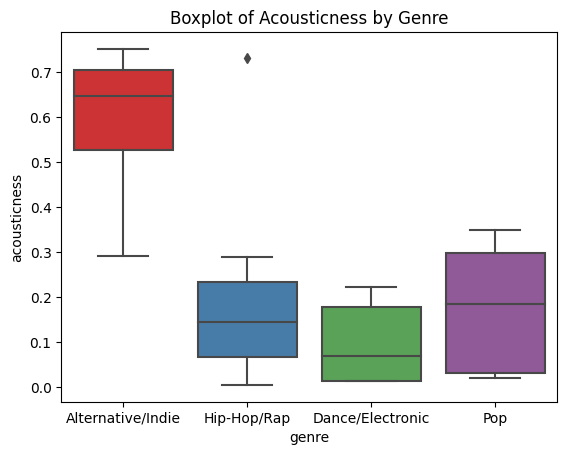

In [39]:
genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

df_genres = df[df['genre'].isin(genres)]
z_scores = stats.zscore(df_genres['acousticness'])
df_genres = df_genres[abs(z_scores) <= 1.96]

sns.boxplot(x='genre', y='acousticness', data=df_genres, palette='Set1')
plt.title('Boxplot of Acousticness by Genre')
plt.show()

### Suggestions for future improvements.
1. If this kind of analysis is conducted occasionally, would it be recommended to create an algorithm that provides all data inside without cells.
2. Could the analysis of song features, such as singers, contribute value to a song's chances of reaching the Top 50
